In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
file = pd.read_csv("Work/excels/CompleteDatasetFinal.csv")
df = pd.DataFrame(file)
df.head()

,Unnamed: 0,Week,Name,Position,Year,Game,FantasyPoints,PassingYards,PassingTDs,Ints,RushAttemps,RushYards,Fumbles,RushTDs,Receptions,ReceivingYards,ReceivingTDs
0,0,1.0,Lamar Jackson,QB,2019,BAL@MIA,42.0,324.0,5.0,0,3,6.0,0,0.0,NaN,NaN,NaN
1,1,1.0,Dak Prescott,QB,2019,NYG@DAL,41.0,405.0,4.0,0,4,12.0,0,0.0,NaN,NaN,NaN
2,2,1.0,Deshaun Watson,QB,2019,HOU@NO,36.0,268.0,3.0,1,4,40.0,0,1.0,NaN,NaN,NaN
3,3,1.0,Matthew Stafford,QB,2019,DET@ARI,34.0,385.0,3.0,0,3,22.0,1,0.0,NaN,NaN,NaN
4,4,1.0,Case Keenum,QB,2019,WAS@PHI,33.0,380.0,3.0,0,0,0.0,0,0.0,NaN,NaN,NaN


In [16]:
df.drop(columns = ["Unnamed: 0"], inplace = True)
df.fillna(0, inplace = True) # Fill missing values with 0
df.head()

,Week,Name,Position,Year,Game,FantasyPoints,PassingYards,PassingTDs,Ints,RushAttemps,RushYards,Fumbles,RushTDs,Receptions,ReceivingYards,ReceivingTDs
0,1.0,Lamar Jackson,QB,2019,BAL@MIA,42.0,324.0,5.0,0,3,6.0,0,0.0,0.0,0.0,0.0
1,1.0,Dak Prescott,QB,2019,NYG@DAL,41.0,405.0,4.0,0,4,12.0,0,0.0,0.0,0.0,0.0
2,1.0,Deshaun Watson,QB,2019,HOU@NO,36.0,268.0,3.0,1,4,40.0,0,1.0,0.0,0.0,0.0
3,1.0,Matthew Stafford,QB,2019,DET@ARI,34.0,385.0,3.0,0,3,22.0,1,0.0,0.0,0.0,0.0
4,1.0,Case Keenum,QB,2019,WAS@PHI,33.0,380.0,3.0,0,0,0.0,0,0.0,0.0,0.0,0.0


In [17]:
df.dtypes

Week              float64
Name               object
Position           object
Year                int64
Game               object
FantasyPoints     float64
PassingYards      float64
PassingTDs        float64
Ints                int64
RushAttemps         int64
RushYards         float64
Fumbles             int64
RushTDs           float64
Receptions        float64
ReceivingYards    float64
ReceivingTDs      float64
dtype: object

In [18]:
df_2023 = df[df["Year"] == 2023]
df_2023.head()

,Week,Name,Position,Year,Game,FantasyPoints,PassingYards,PassingTDs,Ints,RushAttemps,RushYards,Fumbles,RushTDs,Receptions,ReceivingYards,ReceivingTDs
2520,1.0,Tua Tagovailoa,QB,2023,MIA@LAC,33.0,0.0,0.0,1,5,5.0,1,0.0,0.0,0.0,0.0
2521,1.0,Mac Jones,QB,2023,PHI@NE,29.0,0.0,0.0,1,2,15.0,0,0.0,0.0,0.0,0.0
2522,1.0,Jordan Love,QB,2023,GB@CHI,28.0,0.0,0.0,0,3,12.0,0,0.0,0.0,0.0,0.0
2523,1.0,Patrick Mahomes,QB,2023,DET@KC,23.0,0.0,0.0,1,6,45.0,0,0.0,0.0,0.0,0.0
2524,1.0,Justin Herbert,QB,2023,MIA@LAC,22.0,0.0,0.0,0,5,17.0,0,1.0,0.0,0.0,0.0


In [19]:
df_train = df[df["Year"] != 2023]
df_train.tail()

,Week,Name,Position,Year,Game,FantasyPoints,PassingYards,PassingTDs,Ints,RushAttemps,RushYards,Fumbles,RushTDs,Receptions,ReceivingYards,ReceivingTDs
16123,18.0,Equanimeous St. Brown,WR,2022,MIN@CHI,1.0,0.0,0.0,0,0,0.0,0,0.0,1.0,3.0,0.0
16124,18.0,Racey McMath,WR,2022,TEN@JAX,0.0,0.0,0.0,0,1,4.0,0,0.0,0.0,0.0,0.0
16125,18.0,Gunner Olszewski,WR,2022,CLE@PIT,0.0,0.0,0.0,0,2,4.0,0,0.0,0.0,0.0,0.0
16126,18.0,Brandon Johnson,WR,2022,LAC@DEN,-1.0,0.0,0.0,0,0,0.0,1,0.0,0.0,0.0,0.0
16127,18.0,KaVontae Turpin,WR,2022,DAL@WAS,-1.0,0.0,0.0,0,0,0.0,1,0.0,0.0,0.0,0.0


In [20]:
print("Shape of original dataframe (df): ", df.shape)
print("Shape of training dataframe (df_train): ", df_train.shape)
print("Shape of target(year 2023) dataframe (df_2023): ", df_2023.shape)

Shape of original dataframe (df):  (18161, 16)
Shape of training dataframe (df_train):  (14056, 16)
Shape of target(year 2023) dataframe (df_2023):  (4105, 16)


In [21]:
print("Number of players for train df: ",df_train["Name"].nunique())
print("Number of players for target df:", df_2023["Name"].nunique())

Number of players for train df:  755
Number of players for target df: 434


In [22]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"])
# Calculate the correlation matrix for dataframe to create heatmap
corr = numeric_cols.corr()

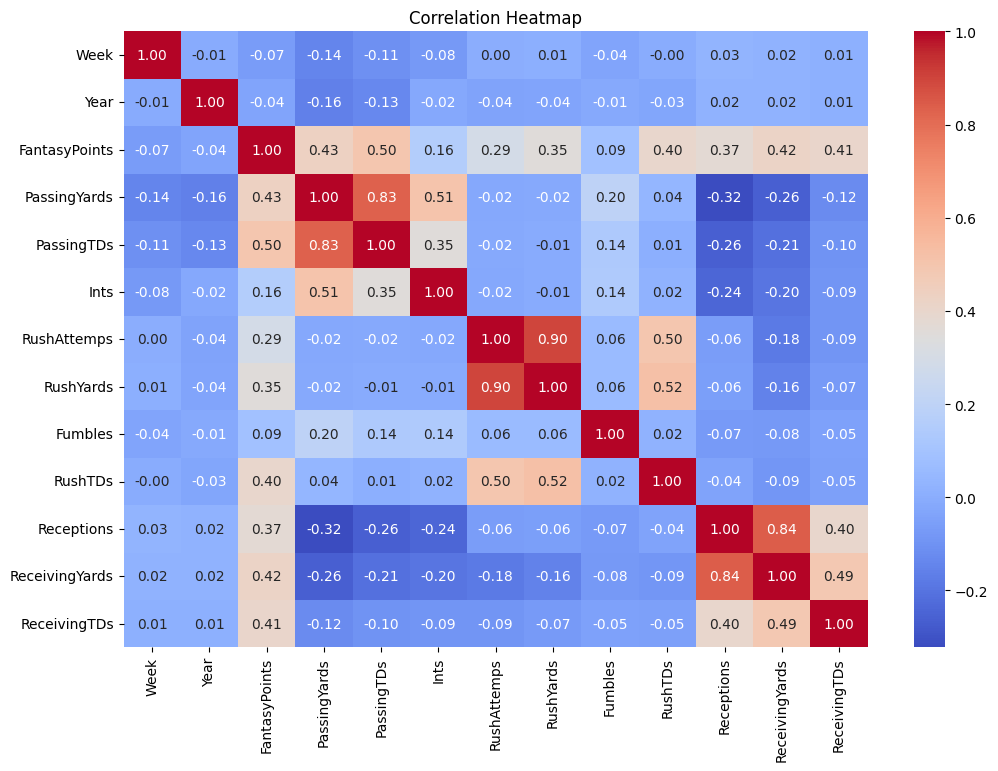

In [23]:
# Plot the heat map
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot= True, cmap = "coolwarm", fmt = ".2f", annot_kws = {"size":10})
plt.title("Correlation Heatmap")
plt.show()

In [24]:
df_train.drop(columns = ["Game","Name"], axis = 1, inplace=True)

In [25]:
df_train = pd.get_dummies(df_train, columns = ["Position"], dtype = int)
df_train.head()

,Week,Year,FantasyPoints,PassingYards,PassingTDs,Ints,RushAttemps,RushYards,Fumbles,RushTDs,Receptions,ReceivingYards,ReceivingTDs,Position_QB,Position_RB,Position_WR
0,1.0,2019,42.0,324.0,5.0,0,3,6.0,0,0.0,0.0,0.0,0.0,1,0,0
1,1.0,2019,41.0,405.0,4.0,0,4,12.0,0,0.0,0.0,0.0,0.0,1,0,0
2,1.0,2019,36.0,268.0,3.0,1,4,40.0,0,1.0,0.0,0.0,0.0,1,0,0
3,1.0,2019,34.0,385.0,3.0,0,3,22.0,1,0.0,0.0,0.0,0.0,1,0,0
4,1.0,2019,33.0,380.0,3.0,0,0,0.0,0,0.0,0.0,0.0,0.0,1,0,0


In [26]:
# playtime = df_train["Year"]
# points = df_train["FantasyPoints"]
# play = pd.DataFrame({'playtime':playtime, 'points':points})
# #play["playtime"] = pd.to_datetime(play["playtime"], format = "%Y")
# play = play.set_index('playtime')
# play


In [27]:
# plt.figure(figsize=(10,4))
# plt.plot(play.index, play.points)
# plt.title('Player performance improvement')
# plt.xlabel('playtime')
# plt.ylabel('points')
# plt.show()

In [28]:
# period = 10
# # Additive decomposition
# print("model = additive")
# add_result = seasonal_decompose(play, model='additive', period=period)
# add_result.plot()
# plt.tight_layout()
# plt.show()

# # Multiplicative decomposition
# print("model = multiplicative")
# mul_result = seasonal_decompose(play, model='multiplicative', period=period)
# mul_result.plot()
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

In [29]:
df_train.shape

(14056, 16)

In [30]:
# Prepare data for training

X = df_train.drop(["FantasyPoints"], axis = 1)
y = df_train["FantasyPoints"]

In [31]:
X.head(3)

,Week,Year,PassingYards,PassingTDs,Ints,RushAttemps,RushYards,Fumbles,RushTDs,Receptions,ReceivingYards,ReceivingTDs,Position_QB,Position_RB,Position_WR
0,1.0,2019,324.0,5.0,0,3,6.0,0,0.0,0.0,0.0,0.0,1,0,0
1,1.0,2019,405.0,4.0,0,4,12.0,0,0.0,0.0,0.0,0.0,1,0,0
2,1.0,2019,268.0,3.0,1,4,40.0,0,1.0,0.0,0.0,0.0,1,0,0


In [32]:
y.head(3)

0    42.0
1    41.0
2    36.0
Name: FantasyPoints, dtype: float64

In [33]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42)

In [34]:
# Initialize and train the model

model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
# Predict on the test set

predictions = model.predict(X_test)

In [36]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error: ", mse)

Mean Squared Error:  1.0430302116720018


In [37]:
# Calculate R-squared (R2)

r2 = r2_score(y_test, predictions)

In [38]:
# Print the report
print("Model Report:")
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(mse ** 0.5))
print("R-squared (R2): {:.2f}".format(r2))

Model Report:
Mean Squared Error (MSE): 1.04
Root Mean Squared Error (RMSE): 1.02
R-squared (R2): 0.99


### Predict the Fantasy Points for the year 2023


In [ ]:
#Make 2023 data as trained data(2019, 2020, 2021, 2022)

In [39]:
df_2023.head(3)

,Week,Name,Position,Year,Game,FantasyPoints,PassingYards,PassingTDs,Ints,RushAttemps,RushYards,Fumbles,RushTDs,Receptions,ReceivingYards,ReceivingTDs
2520,1.0,Tua Tagovailoa,QB,2023,MIA@LAC,33.0,0.0,0.0,1,5,5.0,1,0.0,0.0,0.0,0.0
2521,1.0,Mac Jones,QB,2023,PHI@NE,29.0,0.0,0.0,1,2,15.0,0,0.0,0.0,0.0,0.0
2522,1.0,Jordan Love,QB,2023,GB@CHI,28.0,0.0,0.0,0,3,12.0,0,0.0,0.0,0.0,0.0


In [40]:
df_2023.shape

(4105, 16)

In [41]:
predicted_2023 = df_2023.drop(columns = ["Game","Name"], axis = 1)

In [42]:
predicted_2023 = pd.get_dummies(predicted_2023, columns = ["Position"], dtype = int)
predicted_2023.head()

,Week,Year,FantasyPoints,PassingYards,PassingTDs,Ints,RushAttemps,RushYards,Fumbles,RushTDs,Receptions,ReceivingYards,ReceivingTDs,Position_QB,Position_RB,Position_WR
2520,1.0,2023,33.0,0.0,0.0,1,5,5.0,1,0.0,0.0,0.0,0.0,1,0,0
2521,1.0,2023,29.0,0.0,0.0,1,2,15.0,0,0.0,0.0,0.0,0.0,1,0,0
2522,1.0,2023,28.0,0.0,0.0,0,3,12.0,0,0.0,0.0,0.0,0.0,1,0,0
2523,1.0,2023,23.0,0.0,0.0,1,6,45.0,0,0.0,0.0,0.0,0.0,1,0,0
2524,1.0,2023,22.0,0.0,0.0,0,5,17.0,0,1.0,0.0,0.0,0.0,1,0,0


In [43]:
# Drop fantasy points
X_2023 = predicted_2023.drop(["FantasyPoints"], axis = 1)
X_2023.head(3)

,Week,Year,PassingYards,PassingTDs,Ints,RushAttemps,RushYards,Fumbles,RushTDs,Receptions,ReceivingYards,ReceivingTDs,Position_QB,Position_RB,Position_WR
2520,1.0,2023,0.0,0.0,1,5,5.0,1,0.0,0.0,0.0,0.0,1,0,0
2521,1.0,2023,0.0,0.0,1,2,15.0,0,0.0,0.0,0.0,0.0,1,0,0
2522,1.0,2023,0.0,0.0,0,3,12.0,0,0.0,0.0,0.0,0.0,1,0,0


In [44]:
# Predict fantasy points for 2023
prediction_2023 = model.predict(X_2023)

In [45]:
prediction_2023

array([-2.26,  0.39,  1.  , ...,  0.65,  0.  ,  0.  ])

In [46]:
len(prediction_2023)

4105

In [47]:
# Add the predicted fantasy points to 2023 dataframe
prediction_df = df_2023[["Name"]].copy()
prediction_df["FantasyPoints"] = df_2023["FantasyPoints"]
prediction_df["PredictedFantasyPoints"] = list(prediction_2023)

# Replace existing 'PredictedFantasyPoints' column in next_year_data with new predictions

prediction_df.head(10)

,Name,FantasyPoints,PredictedFantasyPoints
2520,Tua Tagovailoa,33.0,-2.26
2521,Mac Jones,29.0,0.39
2522,Jordan Love,28.0,1.00
2523,Patrick Mahomes,23.0,4.12
2524,Justin Herbert,22.0,7.09
2525,Anthony Richardson,22.0,11.24
2526,Deshaun Watson,22.0,11.57
2527,Kirk Cousins,21.0,-2.42
2528,Trevor Lawrence,21.0,4.68
2529,Brock Purdy,21.0,4.30
